In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
counts_df = pd.read_csv('./data/results/counts_master.csv')
alignment_df = pd.read_csv('./data/results/alignment_rates.csv')
alignment_df = alignment_df.rename(columns={'Unnamed: 0': 'id'})
read_processing_df = counts_df.merge(alignment_df, on='id')

In [3]:
read_processing_df.dtypes

id                         object
dedup_count                 int64
trim_count                  int64
reads                     float64
unpaired                    int64
aligned 0 times           float64
aligned exactly 1 time    float64
aligned >1 times          float64
overall alignment rate    float64
dtype: object

In [4]:
read_processing_df

,id,dedup_count,trim_count,reads,unpaired,aligned 0 times,aligned exactly 1 time,aligned >1 times,overall alignment rate
0,101,1592170,1592170,1592170.0,1592170,5.46,82.60,11.94,94.54
1,103LC,1124237,1124236,597144.0,1124236,1.52,85.37,13.11,98.48
2,105,1089948,1089948,1089948.0,1089948,27.23,62.40,10.37,72.77
3,105LC,1269379,1269379,1089606.0,1269379,2.65,84.42,12.93,97.35
4,107LC,1309196,1309195,1309195.0,1309195,2.35,84.65,13.00,97.65
...,...,...,...,...,...,...,...,...,...
451,ucin433,961346,961346,228585.0,961346,1.68,84.33,14.00,98.32
452,ucin434,704453,704453,704453.0,704453,10.95,75.84,13.20,89.05
453,ucin435,1304985,1304984,1304984.0,1304984,7.36,80.31,12.33,92.64
454,ucin436,1575762,1575761,1575761.0,1575761,3.37,84.20,12.43,96.63


In [37]:
read_processing_df.describe().apply(lambda s: s.apply(lambda x: format(round(x,2), 'g')))

,dedup_count,trim_count,reads,unpaired,aligned 0 times,aligned exactly 1 time,aligned >1 times,overall alignment rate
count,456,456,451,456,456,456,456,456
mean,1.01625e+06,1.01625e+06,1.02273e+06,1.01625e+06,12.3,74.77,12.92,87.7
std,608471,608471,608261,608471,18.6,16.31,3.12,18.6
min,11047,11047,11047,11047,0.87,0.93,0.26,1.2
25%,593488,593488,599017,593488,1.77,72.79,12.13,86.36
50%,952374,952373,957886,952373,3.59,82.1,13.12,96.41
75%,1.36262e+06,1.36262e+06,1.36671e+06,1.36262e+06,13.64,84.43,14.18,98.23
max,4.1961e+06,4.1961e+06,4.1961e+06,4.1961e+06,98.8,87.06,24.11,99.13


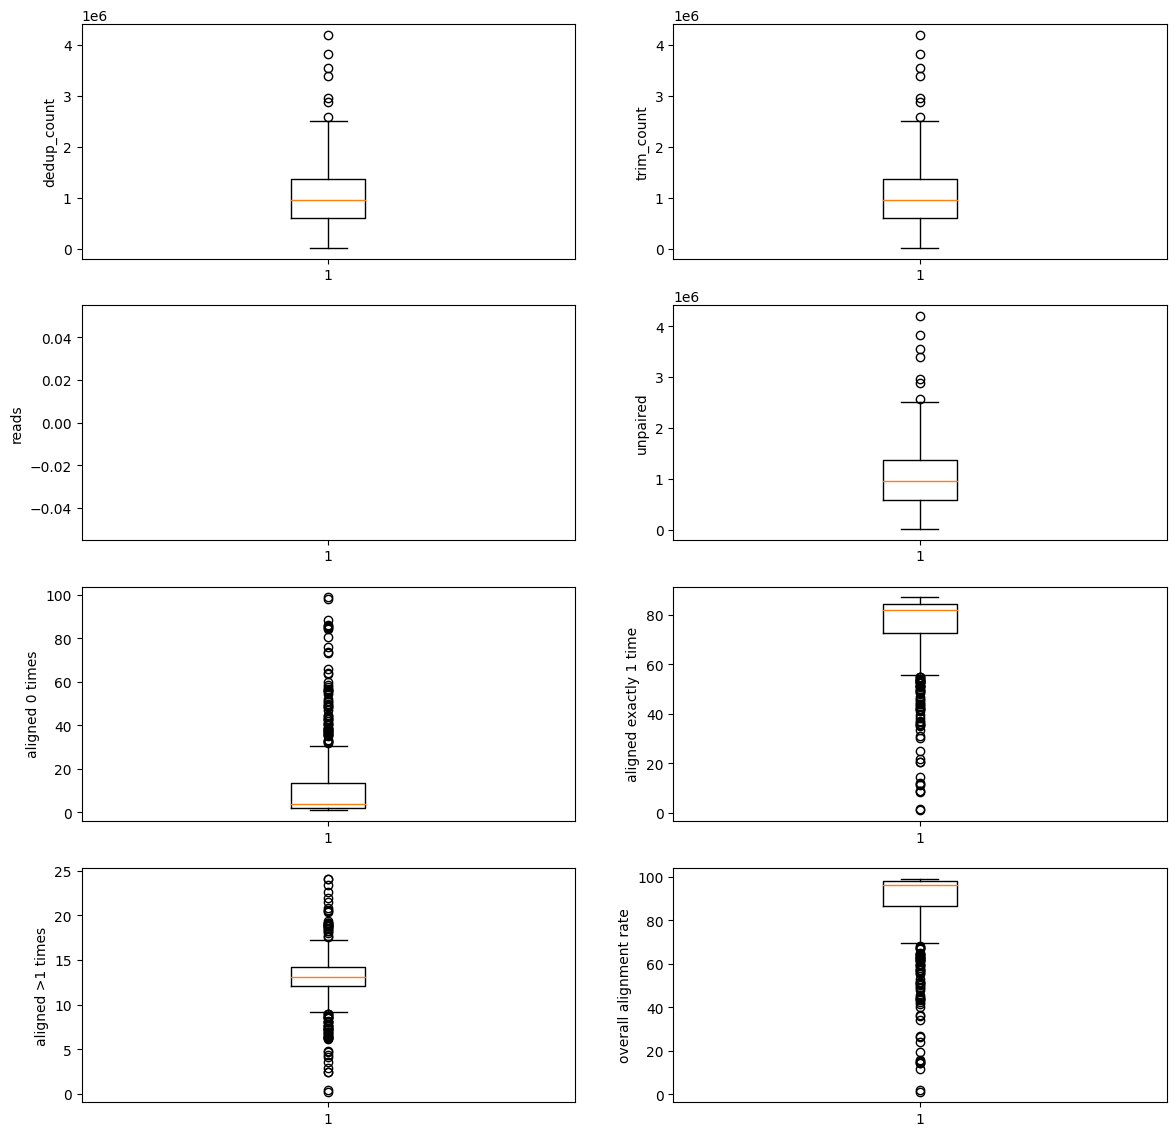

In [5]:
plt.figure(figsize=(14,14))
for idx, column in enumerate(['dedup_count', 'trim_count','reads','unpaired','aligned 0 times',
                               'aligned exactly 1 time','aligned >1 times','overall alignment rate']):
    plt.subplot(4,2,idx+1)
    plt.boxplot(read_processing_df[column])
    plt.ylabel(column)

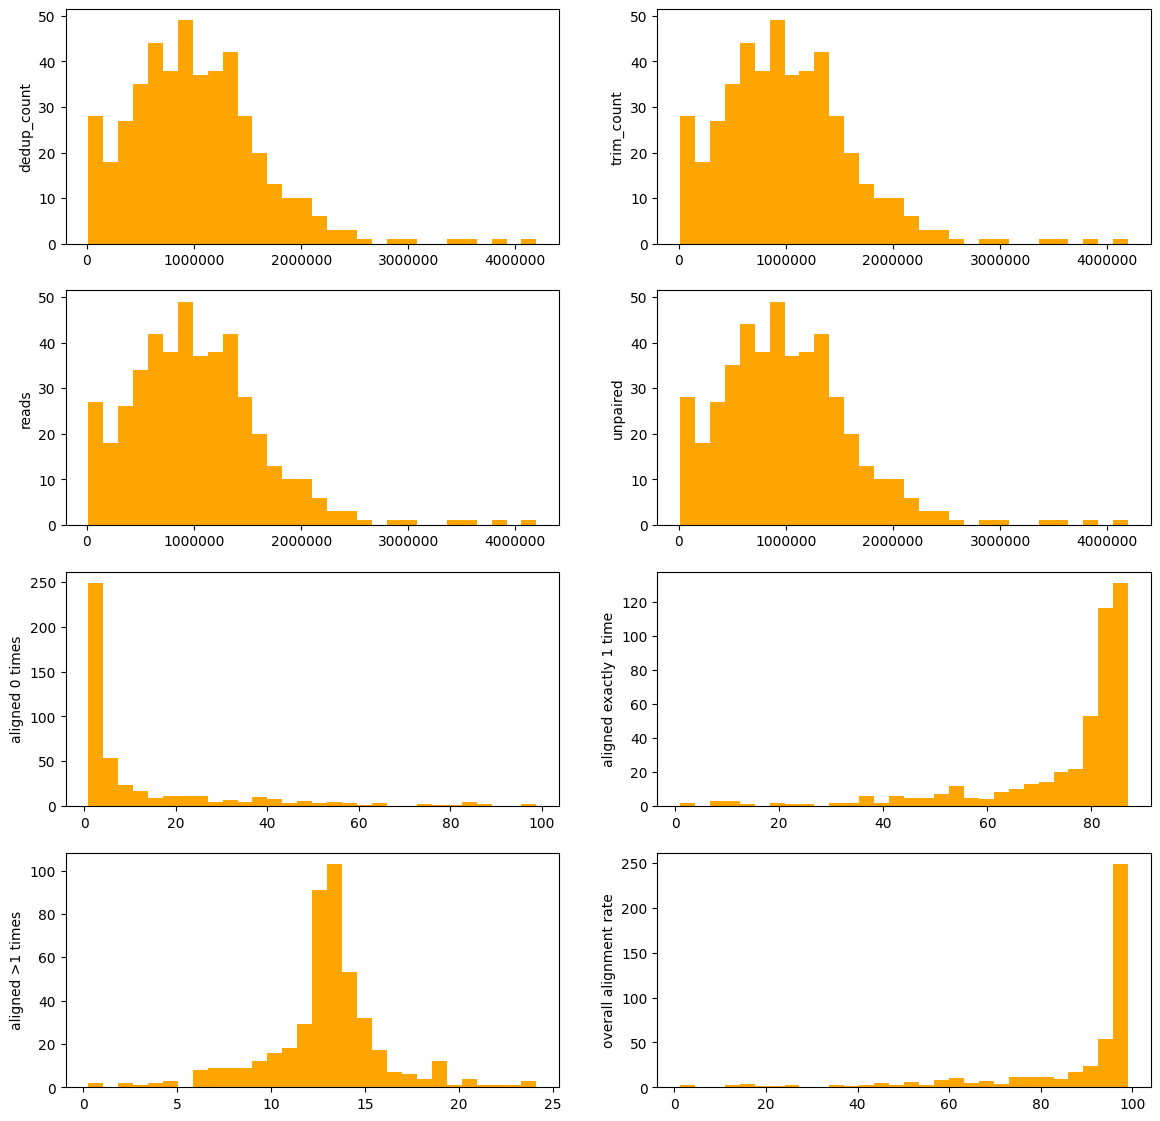

In [6]:
plt.figure(figsize=(14,14))
for idx, column in enumerate(['dedup_count', 'trim_count','reads','unpaired','aligned 0 times',
                               'aligned exactly 1 time','aligned >1 times','overall alignment rate']):
    
    plt.subplot(4,2,idx+1)
    plt.hist(read_processing_df[column], bins = 30, color = 'orange')
    plt.ticklabel_format(style='plain')
    plt.ylabel(column)

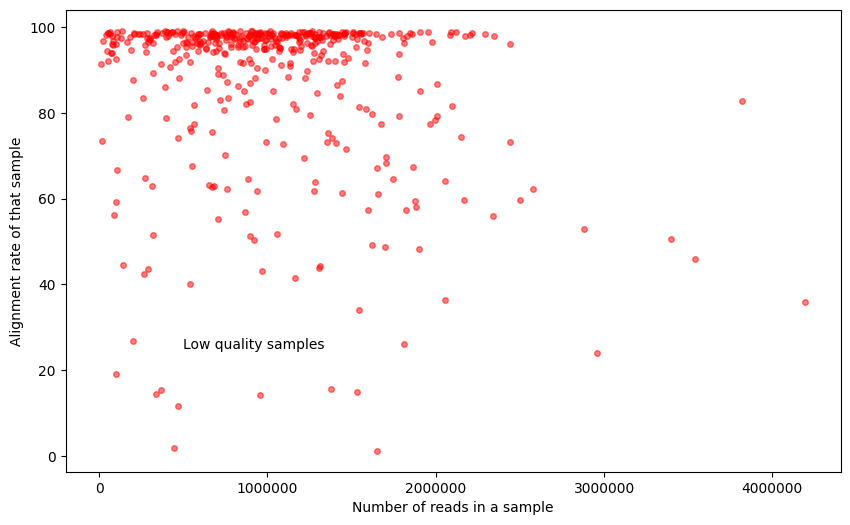

In [34]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(data=read_processing_df, x='reads',y='overall alignment rate', color = 'red', s = 16, alpha=0.5)
ax.ticklabel_format(style='plain')
ax.annotate('Low quality samples', xy=(500000,25))
plt.xlabel('Number of reads in a sample')
plt.ylabel('Alignment rate of that sample')
plt.show()

### Genotype data

In [8]:
bamID_to_sampleID = pd.read_csv('./data/meta/bamID_to_sampleID.csv',header=None)
bamID_to_sampleID

,0,1
0,0,ucin246z
1,1,ucin213conc
2,2,ucin153conc
3,3,ucin266reconc
4,4,828RE
...,...,...
451,451,ucin349conc
452,452,ucin408re
453,453,ucin431z
454,454,818RE


In [9]:
geno_depth = pd.read_table('./data/genotype/geno_vcf.depthSample', header=None).iloc[:, : 400]
geno_depth.index = bamID_to_sampleID[1]
geno_depth

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
1,,,,,,,,,,,,,,,,,,,,,
ucin246z,8,9,13,8,9,13,20,18,21,18,...,0,0,0,0,0,0,0,0,0,0
ucin213conc,24,18,23,22,26,43,39,46,42,34,...,0,0,0,0,0,0,0,0,0,0
ucin153conc,40,58,52,72,63,75,70,71,79,69,...,0,0,0,0,0,0,0,0,0,0
ucin266reconc,11,14,17,17,22,37,31,29,33,49,...,0,0,0,0,0,0,0,0,0,0
828RE,8,9,15,14,18,13,25,29,38,41,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ucin349conc,82,96,111,99,94,97,84,86,69,53,...,0,0,0,0,0,0,0,0,0,0
ucin408re,141,137,182,129,105,108,87,87,69,52,...,0,0,0,0,0,0,0,0,0,0
ucin431z,17,18,21,18,17,24,21,37,28,40,...,0,0,0,0,0,0,0,0,0,0


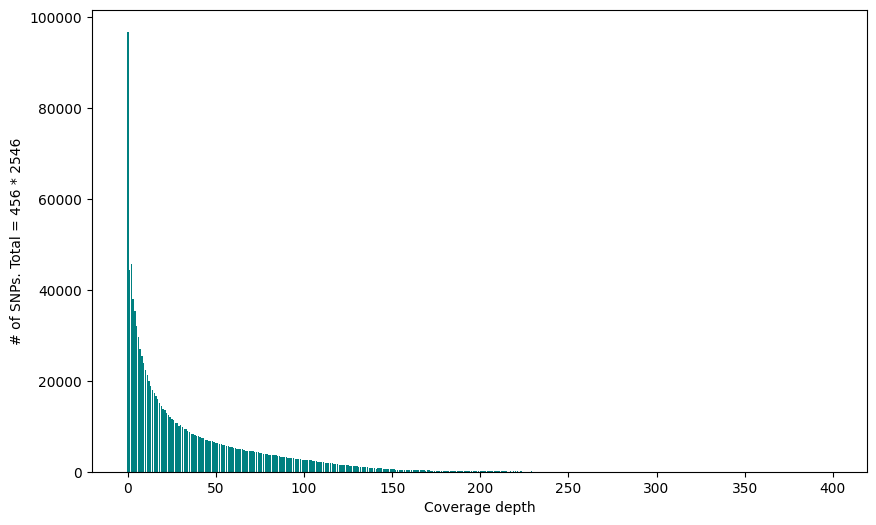

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
width = 0.8
plt.bar(geno_depth.sum().index, geno_depth.sum().values,
        width, color='teal')
plt.ylabel('# of SNPs. Total = 456 * 2546')
plt.xlabel('Coverage depth')
plt.show()

In [11]:
geno_depth.sum()

0      96820
1      44310
2      45674
3      38010
4      35348
       ...  
395        0
396        0
397        0
398        0
399        0
Length: 400, dtype: int64

In [12]:
depths = []
for coverage, frequency in enumerate(geno_depth.sum()):
    depths += [coverage] * frequency

print('Average coverage depth: ', sum(depths)/len(depths))
print('Median coverage depth: ', sorted(depths)[len(depths)//2])

Average coverage depth:  34.166744187649016
Median coverage depth:  20


In [14]:
geno_depth_ind =  pd.read_table('./data/genotype/geno_vcf.counts').drop(['Unnamed: 456'], axis=1)
geno_depth_ind.columns = bamID_to_sampleID[1]
geno_depth_ind

1,ucin246z,ucin213conc,ucin153conc,ucin266reconc,828RE,111LC,ucin043,ucin434,ucin109,ucin384REz,...,ucin362z,151LC,ucin093,ucin036conc,ucin379,ucin349conc,ucin408re,ucin431z,818RE,ucin023
0,52,13,19,41,16,45,15,49,43,15,...,3,0,8,0,12,40,11,41,26,7
1,47,22,18,42,32,28,14,43,21,17,...,13,0,10,2,11,22,6,45,26,17
2,78,44,63,62,43,31,53,66,54,28,...,15,0,7,0,17,53,10,37,49,24
3,154,71,88,107,81,91,71,99,111,66,...,17,0,27,5,35,88,57,89,101,61
4,23,26,31,35,14,16,25,27,2,3,...,5,4,4,4,10,8,5,58,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,14,10,1,10,13,7,15,13,13,3,...,10,0,10,0,1,6,6,15,12,0
2542,22,10,2,26,27,20,15,30,21,2,...,36,1,0,1,9,7,4,30,5,6
2543,23,10,2,26,27,20,15,30,21,2,...,37,1,0,1,9,7,4,30,5,6
2544,15,5,2,9,3,4,0,5,5,1,...,8,0,0,2,3,0,1,9,0,2


In [44]:
geno_depth_ind.describe().T.describe()

,count,mean,std,min,25%,50%,75%,max
count,456.0,456.000000,456.000000,456.0,456.000000,456.000000,456.000000,456.000000
mean,2546.0,34.166744,30.525473,0.0,10.392544,24.527412,50.990680,189.936404
std,0.0,18.719964,12.907667,0.0,9.056900,16.837550,28.826862,65.680866
min,2546.0,0.242341,0.596478,0.0,0.000000,0.000000,0.000000,9.000000
25%,2546.0,20.684211,22.486095,0.0,3.000000,11.000000,29.000000,155.000000
50%,2546.0,34.142380,31.836969,0.0,8.000000,22.000000,51.000000,200.000000
75%,2546.0,48.123036,39.498845,0.0,15.000000,37.000000,73.000000,231.250000
max,2546.0,92.037313,72.229669,0.0,44.000000,83.000000,142.750000,390.000000


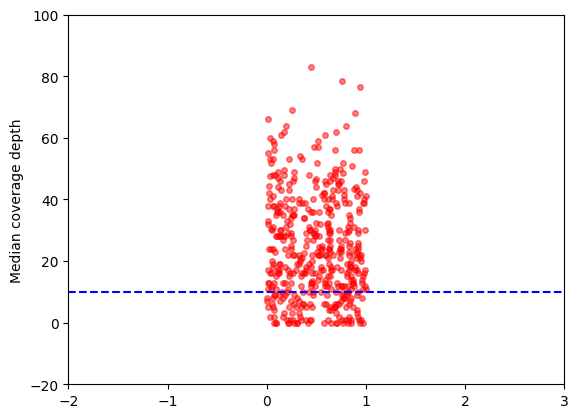

In [16]:
plt.scatter(x=[random.random() for x in range(456)], y=geno_depth_ind.describe().loc['50%'], 
            color = 'red', s = 16, alpha=0.5 )
plt.xlim([-2,3])
plt.ylim(-20,100)
plt.ylabel('Median coverage depth')
plt.axhline(y=10, color='blue', linestyle='dashed')
plt.show()

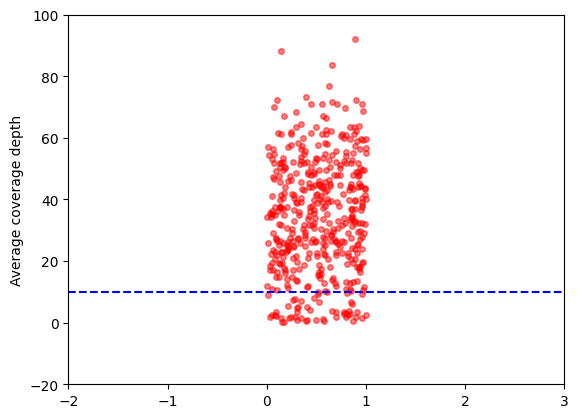

In [17]:
plt.scatter(x=[random.random() for x in range(456)], y=geno_depth_ind.describe().loc['mean'], 
            color = 'red', s = 16, alpha=0.5 )
plt.xlim([-2,3])
plt.ylim(-20,100)
plt.ylabel('Average coverage depth')
plt.axhline(y=10, color='blue', linestyle='dashed')
plt.show()

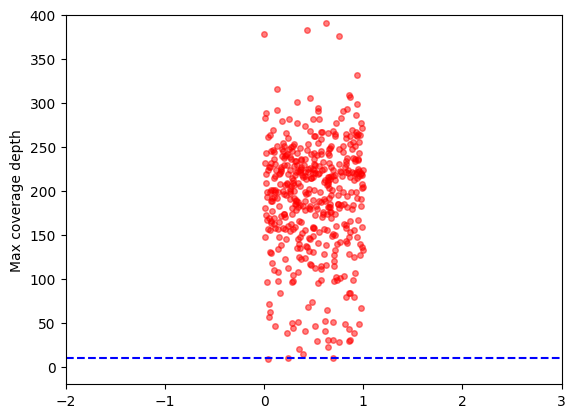

In [18]:
plt.scatter(x=[random.random() for x in range(456)], y=geno_depth_ind.describe().loc['max'], 
            color = 'red', s = 16, alpha=0.5 )
plt.xlim([-2,3])
plt.ylim(-20,400)
plt.ylabel('Max coverage depth')
plt.axhline(y=10, color='blue', linestyle='dashed')
plt.show()

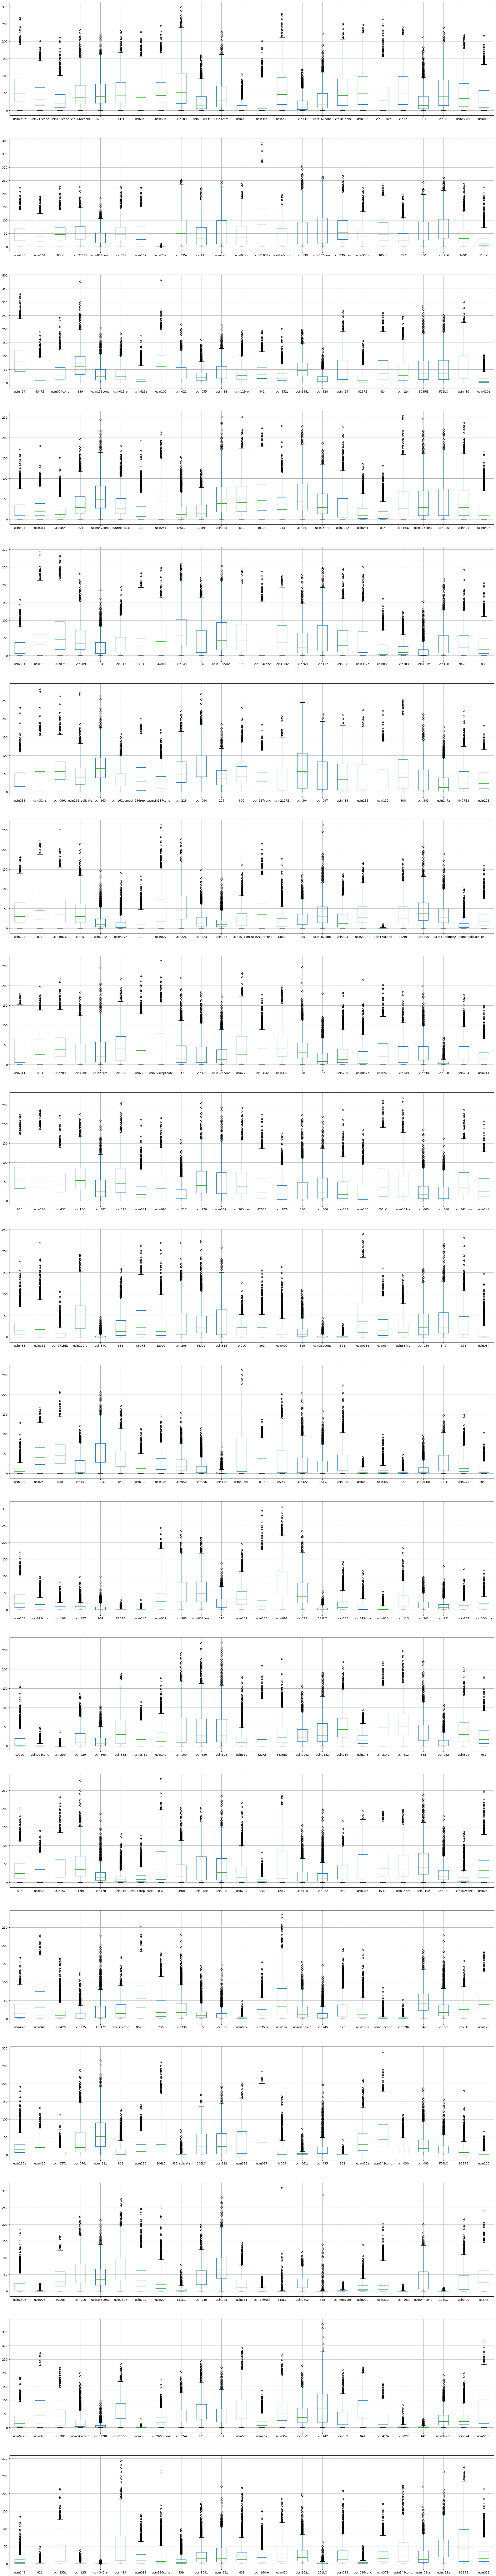

In [19]:
plt.figure(figsize=(30, 160))
idx = 1
for lower_bound in range(0,456,24):
    plt.subplot(19,1,idx)
    geno_depth_ind.iloc[:, lower_bound : lower_bound + 24].boxplot()
    idx += 1

This large array of boxplots allows us to look at the coverage depth for each individual sample. Samples with very low coverage depths do not give us much genotype information.

### Sample locations

In [3]:
geo_data = pd.read_excel('./data/meta/sample_meta.xlsx')

In [4]:
geo_data

,2bRAD,Sample_ID,POP,Set,HapGroup,DLOOP_HAP,DLOOP_Genbank,MITOGENOME,MITOGENOME_Genbank,State,County,Tissue_Type,Sex,Harvest_Date,Sampling_Date,Location,decimalLatitude,decimalLongitude,localityType
0,NaN,ucin001,MO,This study - full,East,Uci19,MW597742,NaN,NaN,MO,Howard,unknown tissue in unknown buffer,NaN,NaN,NaN,NaN,39.143365,-92.695926,NamedPlace_BoundedArea_County
1,NaN,ucin002,MO,This study - full,East,Uci80,MW597743,NaN,NaN,MO,Ste. Genevieve,unknown tissue in unknown buffer,NaN,NaN,NaN,NaN,37.885845,-90.161531,NamedPlace_BoundedArea_County
2,NaN,ucin003,MO,This study - full,East,Uci82,MW597744,NaN,NaN,MO,Pulaski,unknown tissue in unknown buffer,NaN,NaN,NaN,NaN,37.824835,-92.207022,NamedPlace_BoundedArea_County
3,NaN,ucin004,MO,This study - full,East,Uci67,MW597745,NaN,NaN,MO,Montgomery,unknown tissue in unknown buffer,NaN,NaN,NaN,NaN,38.935162,-91.465437,NamedPlace_BoundedArea_County
4,NaN,ucin005,MO,This study - full,East,Uci70,MW597746,NaN,NaN,MO,Ste. Genevieve,unknown tissue in unknown buffer,NaN,NaN,NaN,NaN,37.885845,-90.161531,NamedPlace_BoundedArea_County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,NaN,ucin427,OH-WV,This study - full,East,Uci1,MW598094,NaN,NaN,OH,Morgan,tongue,M,2014-01-30 00:00:00,2014-03-15 00:00:00,"39.59501, -81.87035",39.595010,-81.870350,Coordinates
297,NaN,ucin434,IA-NE,This study - full,East,Uci19,MW598095,NaN,NaN,IA,Lucas,tongue,M,2016-09-25 00:00:00,2016-09-26 00:00:00,"41.002049 N, 93.274419 W; Red Haw State Park",41.002049,-93.274419,Coordinates
298,NaN,ucin435,IA-NE,This study - full,East,Uci54,MW598096,NaN,NaN,IA,Clinton,tongue,F,2017-01-09 00:00:00,2017-01-10 00:00:00,"T-81N, R-03E, S-14",41.822100,-90.578000,NamedPlace_BoundedArea_PLSSSection
299,NaN,ucin436,IA-NE,This study - full,East,Uci19,MW598097,NaN,NaN,IA,Howard,toe pad,NaN,2016-08-30 00:00:00,2016-09-30 00:00:00,intersection of Willow Ave and Old New Oregon Rd,43.331593,-92.120109,NamedPlace_Junction


In [22]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(geo_data["decimalLongitude"], geo_data["decimalLatitude"])]
geodata=gpd.GeoDataFrame(geo_data,crs=crs, geometry=geometry)
usa_shapefile = gpd.read_file(r'./data/meta/geo/tl_rd22_us_state.shp')
river_tributary_shapefile = gpd.read_file(r'./data/meta/geo/ne_10m_rivers_north_america.shp')
river_primary_shapefile = gpd.read_file(r'./data/meta/geo/ne_10m_rivers_lake_centerlines.shp')

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/ds320/share/proj failed


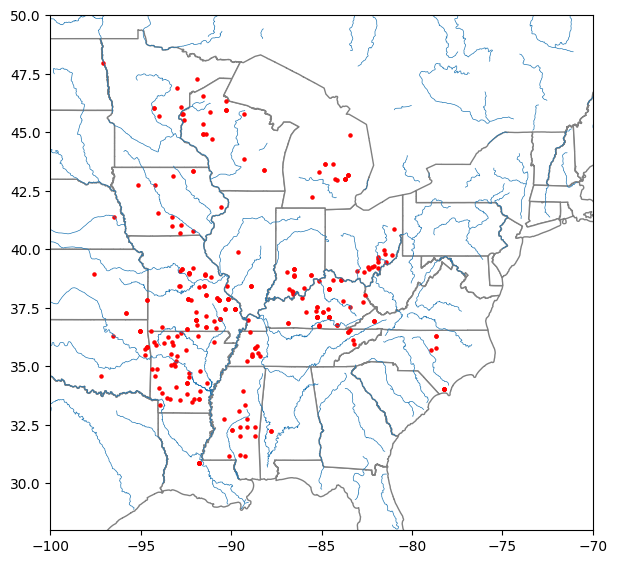

In [23]:
fig, ax = plt.subplots(figsize=(7,7))
usa_shapefile.plot(ax=ax, facecolor='White',edgecolor='gray', linewidth=1)
river_primary_shapefile.plot(ax=ax, linewidth=0.5)
#river_tributary_shapefile.plot(ax=ax, linewidth=0.2)
ax.set_ylim([28, 50])
ax.set_xlim([-100, -70])
geodata.plot(ax=ax, color='red', markersize=5)
plt.show()

### Genotype data

In [24]:
import sys
sys.path.insert(0, '/home/LC/kollad01/gray_fox/scripts')
from ANGSD_to_ML1 import *

In [25]:
geno_data_ML = ANGSD_to_ML1('./data/genotype/geno_vcf.geno', bamID_to_sampleID)

In [26]:
geno_data_ML

,0,1,2,3,4,5,6,7,8,9,...,2536,2537,2538,2539,2540,2541,2542,2543,2544,2545
1,,,,,,,,,,,,,,,,,,,,,
ucin246z,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,2.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.000000,0.0,1.0,0.000000,0.0
ucin213conc,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,2.0,1.0,...,2.0,0.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.000000,0.0
ucin153conc,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,2.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ucin266reconc,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0
828RE,0.0,0.0,0.0,2.0,2.0,0.000000,1.000000,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,2.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ucin349conc,0.0,1.0,0.0,2.0,2.0,0.000000,0.000000,0.0,1.0,0.0,...,1.0,2.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.101449,1.0
ucin408re,0.0,2.0,0.0,2.0,2.0,0.204663,0.208333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
ucin431z,0.0,1.0,1.0,2.0,2.0,0.000000,1.000000,1.0,1.0,0.0,...,1.0,2.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.000000,1.0


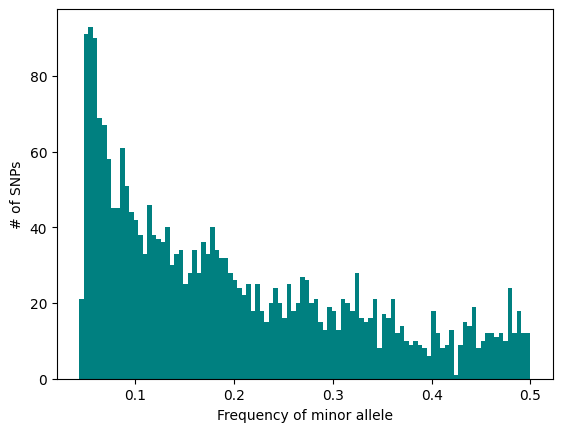

In [43]:
plt.hist(geno_data_ML.describe().loc['mean']/2, bins = 100, color = 'teal')
plt.ylabel('# of SNPs')
plt.xlabel('Frequency of minor allele')
plt.show()

In [27]:
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

##### PCA

axis:  0 	 explained variance:  17.75
axis:  1 	 explained variance:  12.6
CPU times: user 1.04 s, sys: 2.75 s, total: 3.8 s
Wall time: 177 ms


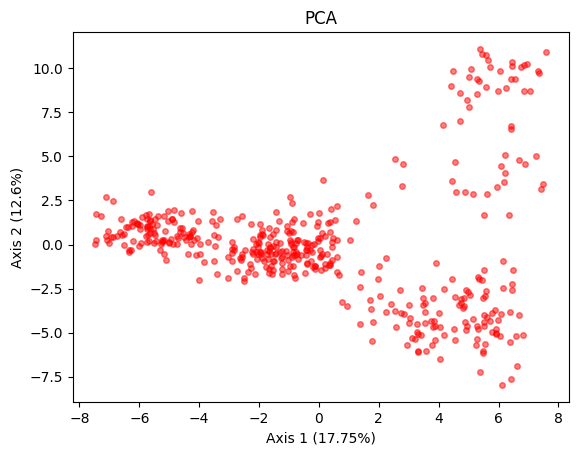

In [28]:
%%time
reduction_obj = PCA(n_components = 2, random_state = 42)
transformed = reduction_obj.fit_transform(geno_data_ML)
for dim, explained_variance in enumerate(reduction_obj.explained_variance_):
    print('axis: ', dim, '\t explained variance: ',
          round(explained_variance,2))
plt.title('PCA')
plt.xlabel(f'Axis 1 ({round(reduction_obj.explained_variance_[0],2)}%)')
plt.ylabel(f'Axis 2 ({round(reduction_obj.explained_variance_[1],2)}%)')
plt.scatter(transformed[:,0], transformed[:,1], color = 'red', s = 16, alpha=0.5)

##### Random Projection

CPU times: user 253 ms, sys: 839 ms, total: 1.09 s
Wall time: 79.2 ms


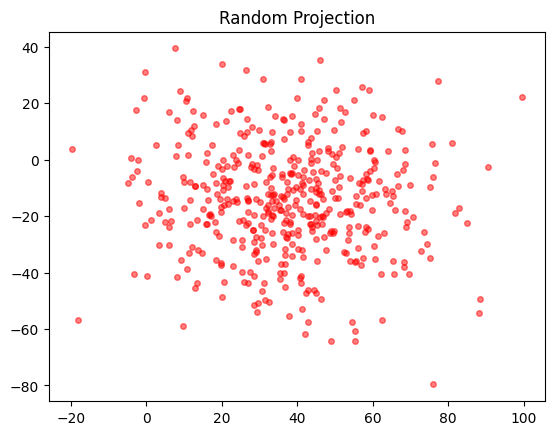

In [29]:
%%time
reduction_obj = GaussianRandomProjection(n_components = 2, random_state = 42)
transformed = reduction_obj.fit_transform(geno_data_ML)
#for dim, explained_variance in enumerate(reduction_obj.explained_variance_):
#    print('axis: ', dim, '\t explained variance: ',
#          round(explained_variance,2))
#transformed
plt.title('Random Projection')
#plt.xlabel(f'Axis 1 ({round(reduction_obj.explained_variance_[0],2)})%')
#plt.ylabel(f'Axis 2 ({round(reduction_obj.explained_variance_[1],2)})%')
plt.scatter(transformed[:,0], transformed[:,1], color = 'red', s = 16, alpha=0.5)

##### LLE

CPU times: user 3.13 s, sys: 415 ms, total: 3.55 s
Wall time: 415 ms


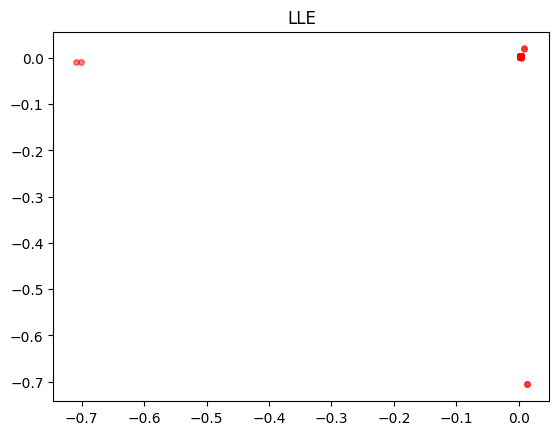

In [30]:
%%time
reduction_obj = LocallyLinearEmbedding(n_components = 2, random_state = 42)
transformed = reduction_obj.fit_transform(geno_data_ML)
plt.title('LLE')
plt.scatter(transformed[:,0], transformed[:,1], color = 'red', s = 16, alpha=0.5)

##### MDS

/opt/anaconda3/envs/ds320/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


CPU times: user 15.3 s, sys: 46 s, total: 1min 1s
Wall time: 4.73 s


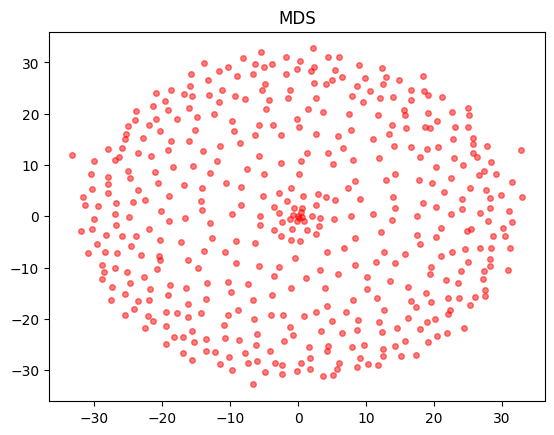

In [31]:
%%time
reduction_obj = MDS(n_components = 2, random_state = 42)
transformed = reduction_obj.fit_transform(geno_data_ML)
plt.title('MDS')
plt.scatter(transformed[:,0], transformed[:,1], color = 'red', s = 16, alpha=0.5)

##### Isomap

CPU times: user 4.03 s, sys: 1.06 s, total: 5.09 s
Wall time: 376 ms


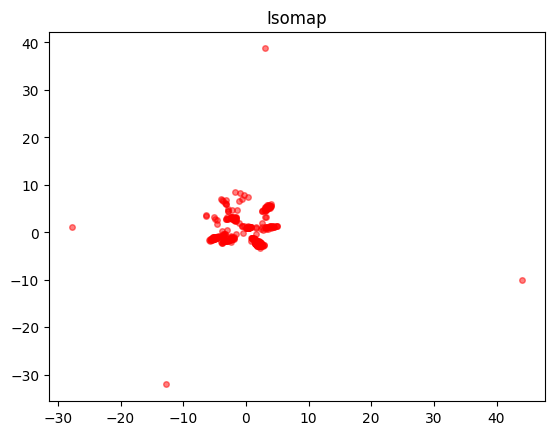

In [32]:
%%time
reduction_obj = Isomap(n_components = 2)
transformed = reduction_obj.fit_transform(geno_data_ML)
plt.title('Isomap')
plt.scatter(transformed[:,0], transformed[:,1], color = 'red', s = 16, alpha=0.5)

##### TSNE

CPU times: user 22.5 s, sys: 1min 17s, total: 1min 40s
Wall time: 10.1 s


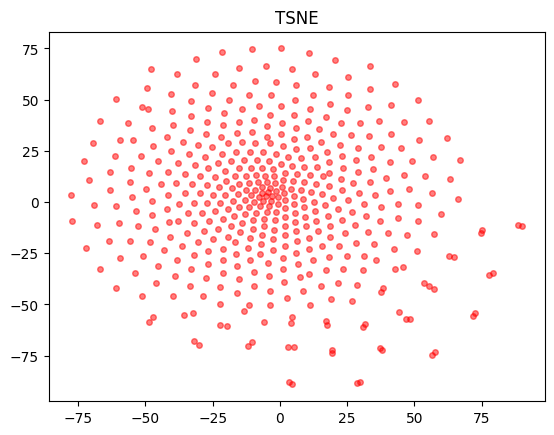

In [33]:
%%time
reduction_obj = TSNE(n_components = 2, random_state=42, method='exact')
transformed = reduction_obj.fit_transform(geno_data_ML)
plt.title('TSNE')
plt.scatter(transformed[:,0], transformed[:,1], color = 'red', s = 16, alpha=0.5)